In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 

import yfinance as yf 

# Fetching the data

In [2]:
stock_symbol = 'AAPL'

data = yf.download(stock_symbol, period="max", interval="1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Data preprocessing

C:\Users\dawid\AppData\Local\Temp\ipykernel_19500\71092140.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


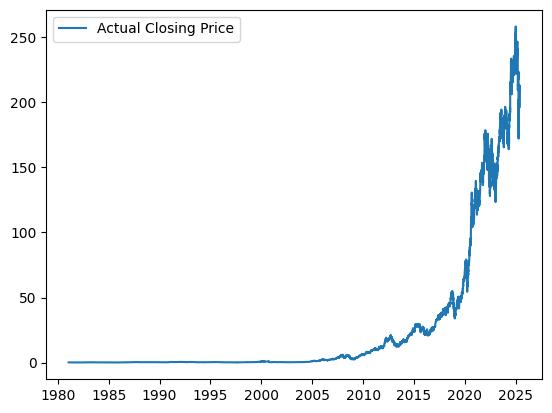

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data.fillna(method='ffill', inplace=True)

# Feature Engineering
# Adding lag features: Using the previous day's closing price as a feature
data['Prev Close'] = data['Close'].shift(1)
data['Prev High'] = data['High'].shift(1)
data['Prev Low'] = data['Low'].shift(1)
data['Prev Volume'] = data['Volume'].shift(1)

# Adding rolling mean (moving average) features
data['Rolling Mean (7 days)'] = data['Close'].rolling(window=7).mean()
data['Rolling Mean (30 days)'] = data['Close'].rolling(window=30).mean()

# Drop the NaN values generated from shifting and rolling mean
data.dropna(inplace=True)

# Scaling the Data (Using MinMaxScaler for normalization)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'Prev Close', 'Prev High', 'Prev Low', 'Prev Volume', 'Rolling Mean (7 days)', 'Rolling Mean (30 days)']].values)

# Prepare the Data for the Model
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), :-1])  # All features except the target 'Close'
        y.append(data[i + look_back, -1])  # The target 'Close'
    return np.array(X), np.array(y)

look_back = 5  # Use the last 5 days' data to predict the next day's price
X, y = create_dataset(scaled_data, look_back)

# Reshape X for LSTM 
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Train-Test Split (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

plt.plot(data.index, data['Close'], label="Actual Closing Price")
plt.legend()
plt.show()

# Models

Linear regression

Mean Squared Error: 0.00017938576972775108


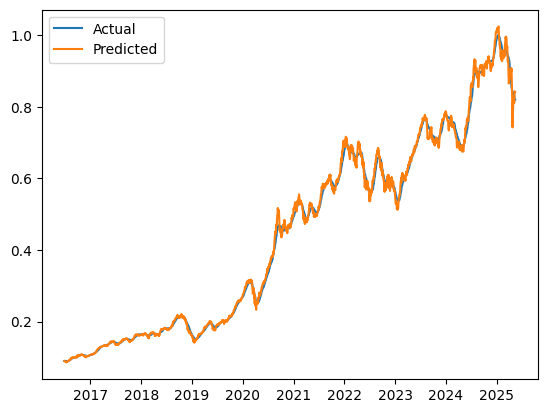

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

model = LinearRegression()
model.fit(X_train_flattened, y_train)

y_pred = model.predict(X_test_flattened)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 10: Plot the Results
plt.plot(data.index[-len(y_test):], y_test, label="Actual")
plt.plot(data.index[-len(y_test):], y_pred, label="Predicted")
plt.legend()
plt.show()
